## TODO compare offset-subtraction to low-pass filtering

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
obj = np.load('../datasets/Run1084_recon3_postPC.npz')

In [47]:
xppI = np.transpose(obj['diffraction'][:, :, :32**2], [2, 0, 1])

In [48]:
xppI.shape

(1024, 64, 64)

In [50]:
X_scangrid = xppI.reshape(32, 32, 64, 64)

/tmp/ipykernel_1096022/3442418750.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_scangrid[10, 10, :, :]))


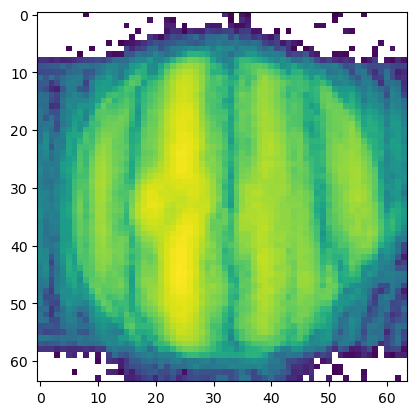

In [51]:
plt.imshow(np.log(X_scangrid[10, 10, :, :]))

In [29]:
X_scangrid.shape

(64, 64, 1024)

In [24]:
XX_grid.reshape(32, 32, -1)

(32, 32, 4096)

In [22]:
X_grid.shape

(32, 32, 64, 64)

In [19]:
X_grid**2

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.00066288,
          0.        , 0.00046973],
         [0.        , 0.        , 0.        , ..., 0.00070744,
          0.        , 0.00065639],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.00059897, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.00076746,
          0.        , 0.0

In [16]:
from ptycho import tf_helper as hh

2023-07-31 22:08:42.571798: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 22:08:42.651605: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-31 22:08:43.054900: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-07-31 22:08:43.054941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

In [18]:
hh._grid_to_channel?

In [1]:
def init():
    from ptycho import params as p
    p.cfg['positions.provided'] = False
    p.cfg['data_source'] = 'lines'
    p.cfg['set_phi'] = True
    p.cfg['nepochs'] = 60

    p.cfg['offset'] = 4
    p.cfg['max_position_jitter'] = 10
    p.cfg['output_prefix'] = 'lines3'

    p.cfg['gridsize'] = 2
    p.cfg['n_filters_scale'] = 2
    p.cfg['object.big'] = True
    p.cfg['intensity_scale.trainable'] = True
    
    p.cfg['outer_offset_train'] = 8
    p.cfg['outer_offset_test'] = 20
    p.cfg['nimgs_train'] = 2
    p.cfg['nimgs_test'] = 2
    
init()
from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

2023-07-31 14:01:56.507442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 14:01:56.592319: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-31 14:01:56.980393: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-07-31 14:01:56.980437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

In [2]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p
from ptycho import generate_data as init
# from ptycho import train

Loading result from disk cache.
Loading result from disk cache.
0.9999917
nphoton 8.962649


In [3]:
p.cfg['outer_offset_train']

8

In [4]:
p.cfg['outer_offset_test']

20

In [5]:
init.X_train.shape

(13448, 64, 64, 4)

In [6]:
from ptycho import tf_helper as hh

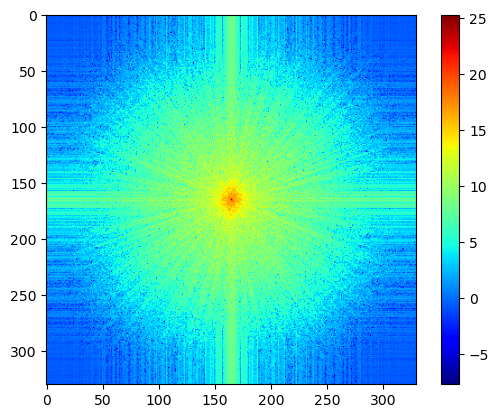

In [7]:
from ptycho import evaluation as eval
import numpy as np
reload(eval)

F2 = np.absolute(eval.fft2d(np.absolute(init.YY_ground_truth[:, :, 0])))**2

plt.imshow(np.log(F2[:, :]), cmap = 'jet')
plt.colorbar()

In [8]:
size = (np.array(init.YY_ground_truth[:, :, 0]).size)

## Full PINN model, best params:

In [9]:
from ptycho import params as p
p.cfg['data_source'] = 'lines'
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['output_prefix'] = 'lines2'

p.cfg['gridsize'] = 2
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

KeyError: 'w'

In [10]:
# plt.plot(d['frc'][0])
# plt.plot(d['frc'][1])


In [11]:
d = save_metrics(stitched_obj, YY_ground_truth, label = 'PINN,NLL,overlaps')
d
#d0 = d

subtracting mean 0.06457644
subtracting mean 0.15387884
mean scale adjustment: 4.346844
mean scale adjustment: 4.346844
performed by index method
performed by index method
performed by index method
mean scale adjustment: 1
mean scale adjustment: 1
performed by index method
performed by index method
performed by index method


{'mae': (0.036913663, 0.014299419),
 'mse': (0.0026327244, 0.0003312106),
 'psnr': (73.9267499156581, 82.92976135806056),
 'frc50': (165, 165)}

In [14]:
d = save_metrics(stitched_obj, YY_ground_truth, label = 'PINN,NLL,overlaps')
d
#d0 = d

subtracting mean -0.18307073
subtracting mean 0.15387884
mean scale adjustment: 4.566107
mean scale adjustment: 4.566107
performed by index method
performed by index method
performed by index method
mean scale adjustment: 1
mean scale adjustment: 1
performed by index method
performed by index method
performed by index method


{'mae': (0.18717046, 0.10040524),
 'mse': (0.052955687, 0.015191995),
 'psnr': (60.89167790517977, 66.31465531094665),
 'frc50': (22, 20)}

In [12]:
stitched_phase = np.angle(stitched_obj)#init.stitch(b, 1, norm = False, nsegments = params()['nsegments'],
                       #part = 'phase')

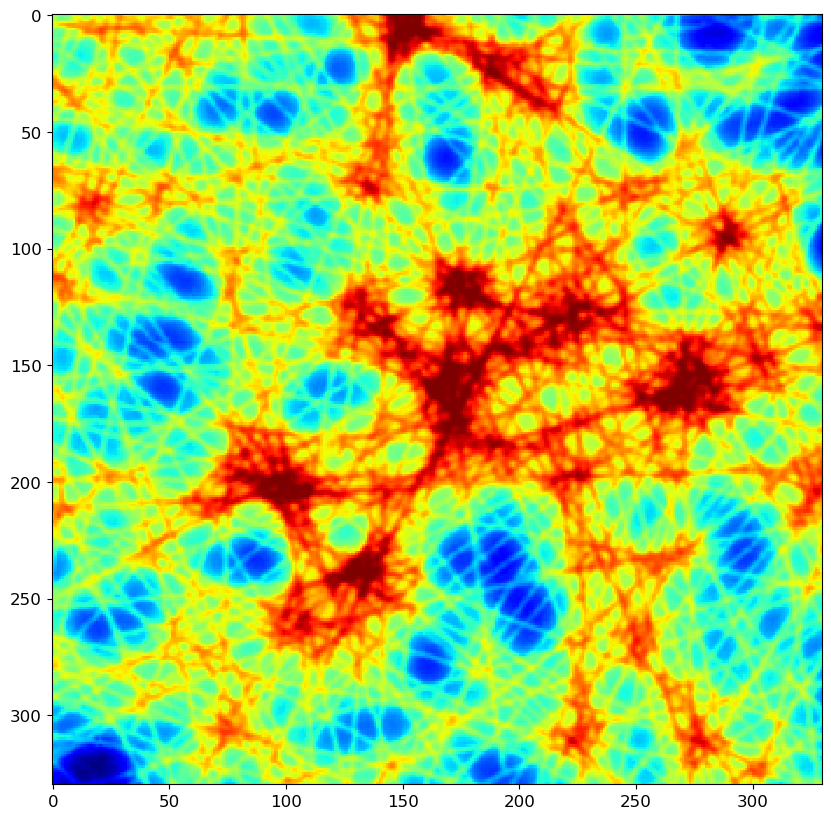

In [12]:
plt.rcParams["figure.figsize"] = (10, 10)
 
import matplotlib.pyplot as plt
plt.imshow(np.absolute(stitched_obj)[0], cmap = 'jet', interpolation='none')

In [12]:
stitched_obj.shape

(2, 330, 330, 1)

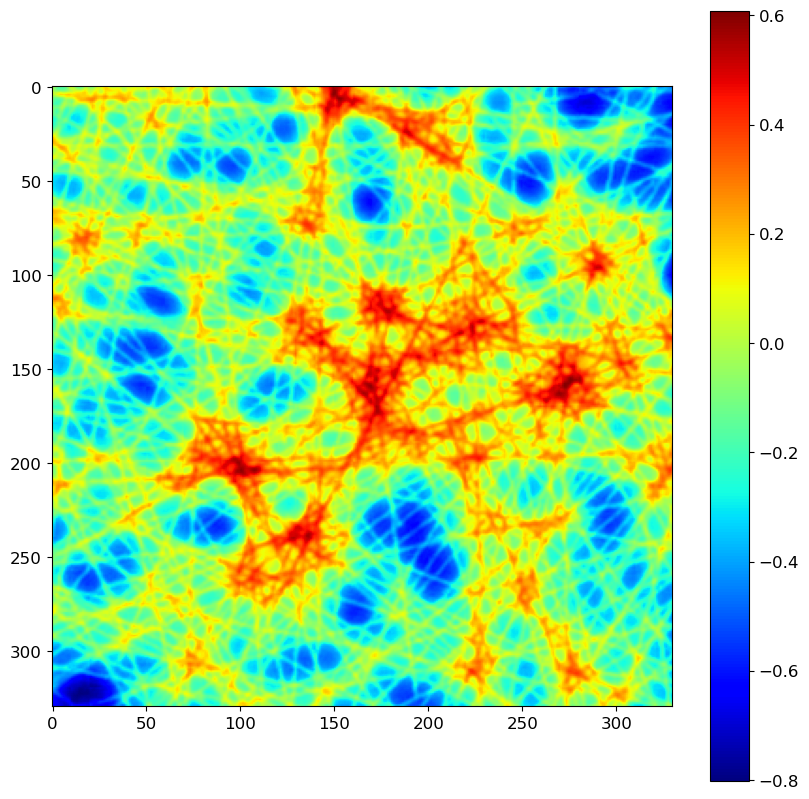

In [13]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.imshow(np.angle(stitched_obj)[0], cmap = 'jet')
plt.colorbar()